In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [136]:
# CSVデータの読み込み
csv_list = ["TimeChart_cyber.csv", "TimeChart_JT.csv", "TimeChart_kose.csv"] # CSVファイルのリスト
data = pd.read_csv('csv/' + csv_list[0], encoding="UTF-8", index_col="日付", parse_dates=True) # CSVファイルの読み込み

In [137]:
# データの整形
data = data.sort_values("日付") # 昔のデータから順番にsort
max_num = data["始値"].max() # "始値"のカラムの最大値
data["始値"] /= max_num # 0~1の範囲に変換
open_price = data["始値"] # "日付"のカラムを取得

In [138]:
# データの分割
train = open_price[0:len(open_price) * 7 // 11]
test = open_price[len(open_price) * 7 // 11:]

# 学習する過去何日分かのデータの作成をする関数の定義
interval = 10
def make_data(data, interval=10):
    input_tensor = [] # 学習データ
    output_tensor = [] # 結果
    open_price = list(data)
    for i in range(len(open_price)):
        if i < interval:
            continue
        output_tensor.append(open_price[i])
        z = []
        for j in range(interval):
            d = i + j -interval
            z.append(open_price[d])
        input_tensor.append(z)
    return (input_tensor, output_tensor)

# 関数の実行
X_train, y_train = make_data(train)
X_test, y_test = make_data(test)

In [139]:
lr = LinearRegression(normalize=True)
lr.fit(X_train, y_train) # 学習
y_pre = lr.predict(X_test) # テストデータの予測

y_pre_array = np.array(y_pre)
y_pre_array *= max_num
y_test_array = np.array(y_test)
y_test_array *= max_num

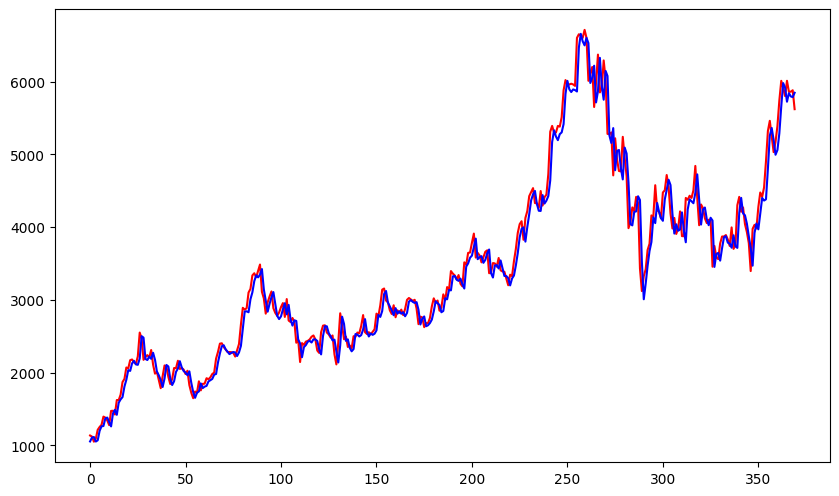

In [140]:
# グラフを表示
plt.figure(figsize=(10, 6), dpi=100) # figureの設定
plt.plot(y_test_array, c='r') # テストのグラフを赤でplot
plt.plot(y_pre_array, c='b') # 予測のグラフを青でplot
plt.show() # 表示

In [141]:
# １〜４週間後の株価を予測
predict_list = []
for i in range(4):
    X_pre = []
    X_pre.append(open_price[-1:-interval-1:-1])
    y_predict_small = lr.predict(X_pre) # 予測
    predict_list.append(y_predict_small * max_num)
    open_price = list(open_price)
    open_price.append(y_predict_small)
    open_price = np.array(open_price)
    print("{}週間後: {}".format(i+1, predict_list[i][0]))

1週間後: 5386.331726104142
2週間後: 5766.523775606963
3週間後: 5912.50381271723
4週間後: 5758.045712690563
